In [1]:
import torch

In [2]:
import molgrid

In [3]:
from openbabel import pybel

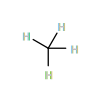

In [10]:
# create simple molecule
m = pybel.readstring('smi','C')
m.addh()
m

In [5]:
# atom typing based on atomic number and valence, with a constant radius of 1.5
def mytyper(atom):
    if hasattr(atom, 'GetValence'):
        return ([atom.GetAtomicNum(),atom.GetValence()], 1.5)
    else:
        return ([atom.GetAtomicNum(),atom.GetExplicitDegree()], 1.5)


In [9]:
# create the typer; the explicit names may be omitted, in which case numerical names
# will be automatically created
t = molgrid.PythonCallbackVectorTyper(mytyper, 2, ["anum","valence"])
# get types for our simple molecule using our typer
t

In [7]:
types = [t.get_atom_type_vector(a.OBAtom) for a in m.atoms]

In [8]:
types

[([6.0, 4.0], 1.5),
 ([1.0, 1.0], 1.5),
 ([1.0, 1.0], 1.5),
 ([1.0, 1.0], 1.5),
 ([1.0, 1.0], 1.5)]